# Setup

In [1]:
!pip install nltk


In [2]:
!pip install numpy
!pip install pandas
!pip install nltk
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install gensim


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 43.3 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.0
    Uninstalling scipy-1.14.0:
      Successfully uninstalled scipy-1.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cuml 24.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.7.2 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pointpats 2.5.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
spaghetti 1.7.6 requires shapely>=2.0.1, but you have shapely 1.8.5.

In [3]:
# load library
import numpy as np
import pandas as pd
import pickle 
import os
# from google.colab import drive
# drive.mount('/content/drive')
# os.chdir('/content/drive/MyDrive/UChicago/Spring 2022/MACS 37000 Thinking with Deep Learning for Complex Social & Cultural Data Analysis/Misogynistic Memes/MEME-main/')
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import ast
from sklearn.preprocessing import MultiLabelBinarizer
from string import punctuation
from gensim.models import KeyedVectors
#eval metrics
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from string import punctuation

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
# import os
# from google.colab import drive
# drive.mount('/content/drive')
# os.chdir('/content/drive/MyDrive/UChicago/Spring 2022/MACS 37000 Thinking with Deep Learning for Complex Social & Cultural Data Analysis/Misogynistic Memes/MEME-main/')

# Preparing Data

In [5]:
# Open file
df_train = pd.read_csv('/kaggle/input/facebook-hateful-meme-captions/train.csv')
df_train.head()

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."


In [6]:
df_test = pd.read_csv('/kaggle/input/facebook-hateful-meme-captions/dev.csv')
len(df_test)

500

In [7]:
meme = df_train
meme = meme[['img','label','text']]
meme.columns = ['image','label','text']

In [8]:
meme

,image,label,text
0,img/42953.png,0,its their character not their color that matters
1,img/23058.png,0,don't be afraid to love again everyone is not ...
2,img/13894.png,0,putting bows on your pet
3,img/37408.png,0,i love everything and everybody! except for sq...
4,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."
...,...,...,...
8495,img/10423.png,1,nobody wants to hang auschwitz me
8496,img/98203.png,1,when god grants you a child after 20 years of ...
8497,img/36947.png,1,gays on social media: equality! body positivit...
8498,img/16492.png,1,having a bad day? you could be a siamese twin ...


In [9]:
#load meme data 
def process(meme):
    meme = meme[['img','label','text']]
    meme.columns = ['image','label','text']
#     def binary_labeling(col0):
#         if col0 == 'offensive':
#             return 0
#         if col0 == 'Non-offensiv':
#             return 1
        
    def clean_text(text):
        text = re.sub(r'#', '', text)  # Remove hashtags
        text = re.sub(r'[0-9]', '', text)  # Remove digits
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and special characters
        text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
        text = text.strip()  # Remove leading and trailing spaces
        text = text.lower()  # Convert text to lowercase
        return text
    
    meme['text'] = meme['text'].apply(clean_text)
#     meme['meme'] = meme['label'].apply(binary_labeling)
    meme['path'] = '/kaggle/input/facebook-hateful-meme-captions/img/'+meme['image']
    meme = meme.dropna()  # Remove null entries
    meme = meme.drop_duplicates()  # Remove duplicates
    meme.reset_index()
    return meme




In [10]:
# #Splitting the data into training, testing sets
# from sklearn.model_selection import train_test_split
train, test = process(df_train),process(df_test)

/tmp/ipykernel_37/2937767324.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meme['text'] = meme['text'].apply(clean_text)
/tmp/ipykernel_37/2937767324.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meme['text'] = meme['text'].apply(clean_text)


In [11]:
train1=train
test1 = test

In [12]:
train1

,image,label,text,path
0,img/42953.png,0,its their character not their color that matters,/kaggle/input/facebook-hateful-meme-captions/i...
1,img/23058.png,0,dont be afraid to love again everyone is not l...,/kaggle/input/facebook-hateful-meme-captions/i...
2,img/13894.png,0,putting bows on your pet,/kaggle/input/facebook-hateful-meme-captions/i...
3,img/37408.png,0,i love everything and everybody except for squ...,/kaggle/input/facebook-hateful-meme-captions/i...
4,img/82403.png,0,everybody loves chocolate chip cookies even hi...,/kaggle/input/facebook-hateful-meme-captions/i...
...,...,...,...,...
8495,img/10423.png,1,nobody wants to hang auschwitz me,/kaggle/input/facebook-hateful-meme-captions/i...
8496,img/98203.png,1,when god grants you a child after years of you...,/kaggle/input/facebook-hateful-meme-captions/i...
8497,img/36947.png,1,gays on social media equality body positivity ...,/kaggle/input/facebook-hateful-meme-captions/i...
8498,img/16492.png,1,having a bad day you could be a siamese twin a...,/kaggle/input/facebook-hateful-meme-captions/i...


# Image to Vectors

In [13]:
import cv2

def resize_img(path):
  try:
    img = cv2.imread(path)
    img = cv2.resize(img, (75, 115))
    img = img.astype(np.float32)/255
    return img
  except Exception as e:
    print(str(e))
    return None

In [14]:
train_imgs = []
i = 0
for index, row in train.iterrows():
  if i%100 == 0:
    print("Processing i:", i, str(row['path']))
  img = resize_img(str(row['path']))
  if img is not None:
    train_imgs.append(img)
  else:
    train = train.drop(index)
    print("Dropping row:", index, "Length:", len(train))
  i += 1

Processing i: 0 /kaggle/input/facebook-hateful-meme-captions/img/img/42953.png
Processing i: 100 /kaggle/input/facebook-hateful-meme-captions/img/img/05384.png
Processing i: 200 /kaggle/input/facebook-hateful-meme-captions/img/img/96785.png
Processing i: 300 /kaggle/input/facebook-hateful-meme-captions/img/img/74132.png
Processing i: 400 /kaggle/input/facebook-hateful-meme-captions/img/img/67384.png
Processing i: 500 /kaggle/input/facebook-hateful-meme-captions/img/img/67512.png
Processing i: 600 /kaggle/input/facebook-hateful-meme-captions/img/img/43128.png
Processing i: 700 /kaggle/input/facebook-hateful-meme-captions/img/img/86912.png
Processing i: 800 /kaggle/input/facebook-hateful-meme-captions/img/img/26459.png
Processing i: 900 /kaggle/input/facebook-hateful-meme-captions/img/img/58301.png
Processing i: 1000 /kaggle/input/facebook-hateful-meme-captions/img/img/30792.png
Processing i: 1100 /kaggle/input/facebook-hateful-meme-captions/img/img/05483.png
Processing i: 1200 /kaggle/i

In [15]:
test_imgs = []
i = 0
for index, row in test.iterrows():
  if i%100 == 0:
    print("Processing i:", i, str(row['path']))
  img = resize_img(str(row['path']))
  if img is not None:
    test_imgs.append(img)
  else:
    test = test.drop(index)
    print("Dropping row:", index, "Length:", len(test))
  i += 1

Processing i: 0 /kaggle/input/facebook-hateful-meme-captions/img/img/08291.png
Processing i: 100 /kaggle/input/facebook-hateful-meme-captions/img/img/79085.png
Processing i: 200 /kaggle/input/facebook-hateful-meme-captions/img/img/72061.png
Processing i: 300 /kaggle/input/facebook-hateful-meme-captions/img/img/38095.png
Processing i: 400 /kaggle/input/facebook-hateful-meme-captions/img/img/30927.png


In [16]:
train_np_imgs = np.array(train_imgs)
train_np_imgs.shape

(8500, 115, 75, 3)

In [17]:
test_np_imgs = np.array(test_imgs)
test_np_imgs.shape

(500, 115, 75, 3)

In [18]:
!python -m nltk.downloader


/opt/conda/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> ^C
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/nltk/downloader.py", line 982, in _interactive_download
    DownloaderGUI(self).mainloop()
  File "/opt/conda/lib/python3.10/site-packages/nltk/downloader.py", line 1226, in __init__
    top = self.top = Tk()
  File "/opt/conda/lib/python3.10/tkinter/__init__.py", line 2299, in __init__
    self.tk = _tkinter.create(screenName, baseName, className, interactive, wantobjects, useTk, sync, use)
_tkinter.TclError: no dis

In [19]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 85.2 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [20]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [21]:
import spacy
nlp = spacy.load('en_core_web_sm')

def clean_text_spacy(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    return ' '.join(tokens)

# Apply to train and test datasets
train['text'] = train['text'].apply(clean_text_spacy)
test['text'] = test['text'].apply(clean_text_spacy)


In [22]:
test

,image,label,text,path
0,img/08291.png,1,white people shoot range,/kaggle/input/facebook-hateful-meme-captions/i...
1,img/46971.png,1,bravery fine,/kaggle/input/facebook-hateful-meme-captions/i...
2,img/03745.png,1,order come white privilege discount bring total,/kaggle/input/facebook-hateful-meme-captions/i...
3,img/83745.png,1,time send parasite desert,/kaggle/input/facebook-hateful-meme-captions/i...
4,img/80243.png,1,mississippi wind chime,/kaggle/input/facebook-hateful-meme-captions/i...
...,...,...,...,...
495,img/83675.png,0,m go to like phelp day,/kaggle/input/facebook-hateful-meme-captions/i...
496,img/37198.png,0,relaxed feel level,/kaggle/input/facebook-hateful-meme-captions/i...
497,img/48670.png,0,look sandwich maker club find wish clearance,/kaggle/input/facebook-hateful-meme-captions/i...
498,img/09863.png,0,diverse group woman,/kaggle/input/facebook-hateful-meme-captions/i...


# Text to Vectors

In [26]:
#keras 
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, load_model
from keras.layers import Embedding, LSTM, Dropout, Dense, Input, Bidirectional, Flatten, Conv2D, MaxPooling2D, concatenate, Conv1D, MaxPooling1D
import keras.backend as K
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model, load_model


In [27]:
#Fitting the Keras Tokenizer on the entire dataset
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = meme['text'].map(len).max()
EMBEDDING_DIM = 300
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=True)
tokenizer.fit_on_texts(meme['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
print('Max len:', MAX_SEQUENCE_LENGTH)

Found 9135 unique tokens.
Max len: 433


In [30]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

In [32]:
# Assuming word2vecDict is a KeyedVectors object
word2vecDict = wv  # This should be your pre-trained KeyedVectors object
embed_size = 300
embeddings_index = dict()

# Directly looping through the vocabulary in KeyedVectors (no need for .wv)
for word in word2vecDict.key_to_index:
    embeddings_index[word] = word2vecDict[word]  # Access the vector directly

print(f"Loaded {len(embeddings_index)} word vectors.")

# Initialize embedding matrix, using np.zeros for better initialization
embedding_matrix = np.zeros((len(word_index) + 1, embed_size))

embeddedCount = 0
for word, i in word_index.items():
    i -= 1  # Adjust index if necessary
    embedding_vector = embeddings_index.get(word)  # Get the vector if it exists
    if embedding_vector is not None: 
        embedding_matrix[i] = embedding_vector
        embeddedCount += 1

print(f"Total embedded: {embeddedCount} common words.")
del embeddings_index  # Clean up
print(embedding_matrix)


Loaded 3000000 word vectors.
Total embedded: 7832 common words.
[[ 0.08007812  0.10498047  0.04980469 ...  0.00366211  0.04760742
  -0.06884766]
 [ 0.20410156  0.01318359  0.07568359 ... -0.21191406 -0.1328125
   0.10839844]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.16894531  0.16210938  0.06445312 ... -0.04125977 -0.1796875
   0.07861328]
 [ 0.01495361  0.51953125  0.02233887 ... -0.18652344  0.08203125
   0.12304688]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [33]:
#This function loads the word2vec model and intializes the embedding matrix. Each word which is present in the embedding is then added as a vector to the embedding matrix.
def get_embedding_matrix(typeToLoad):
#   if typeToLoad == "glove":
#     EMBEDDING_FILE="/content/glove.twitter.27B.100d.txt"
#     embed_size = 100
  if typeToLoad == "word2vec":
#     word2vecDict = KeyedVectors.load_word2vec_format("/content/GoogleNews-vectors-negative300.bin", binary=True)
    word2vecDict = wv
    embed_size = 300
#   elif typeToLoad == "fasttext":
#     EMBEDDING_FILE="/content/wiki-news-300d-1M.vec"
#     embed_size = 300

  if typeToLoad == "glove" or typeToLoad == "fasttext":
    embeddings_index = dict()
    f = open(EMBEDDING_FILE)
    for line in f:
      values = line.split()
      word = values[0]
      coefs = np.asarray(values[1:], dtype='float32')
      embeddings_index[word] = coefs
    f.close()
    print("Loaded " + str(len(embeddings_index)) + " word vectors.")
  else:
    embeddings_index = dict()
    for word in word2vecDict.wv.vocab:
      embeddings_index[word] = word2vecDict.word_vec(word)
    print("Loaded " + str(len(embeddings_index)) + " word vectors.")
        
  embedding_matrix = 1 * np.random.randn(len(word_index)+1, embed_size)

  embeddedCount = 0
  for word, i in word_index.items():
    i-=1
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: 
      embedding_matrix[i] = embedding_vector
      embeddedCount+=1
  print("total embedded:", embeddedCount, "common words")
        
  del(embeddings_index)
        
  return embedding_matrix

In [ ]:
# word2vec_embedding_matrix = get_embedding_matrix("word2vec") 

In [34]:
word2vec_embedding_matrix = embedding_matrix

In [35]:
X_text_train = tokenizer.texts_to_sequences(train['text'].values)
X_text_train = pad_sequences(X_text_train, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of train tensor:', X_text_train.shape)

Shape of train tensor: (8500, 433)


In [36]:
X_text_test = tokenizer.texts_to_sequences(test['text'].values)
X_text_test = pad_sequences(X_text_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of train tensor:', X_text_test.shape)

Shape of train tensor: (500, 433)


In [37]:
X_img_train = train_np_imgs
X_img_train.shape

X_img_test = test_np_imgs
X_img_test.shape


(500, 115, 75, 3)

In [39]:
train_labels = train['label']
train_labels.shape

test_labels = test['label']
test_labels.shape

(500,)

In [40]:
X_img_train.shape

(8500, 115, 75, 3)

In [41]:
X_text_train.shape

(8500, 433)

In [42]:
train_labels.shape

(8500,)

# Multimodel Deep Learning

In [49]:
#The model architecture consists of an LSTM and a CNN. The LSTM takes the input as a padded sequence of the overview of a movie. The CNN takes a movie poster as the input. Each model has a fully connected layer whose output is concatenated and fed forward to a final fully connected layer with 18 output units. The output layer has a sigmoid activation function.
#Binary crossentropy was the chosen loss function and the Adam optimizer was used.
def compile_model(embedding_matrix):
  lstm_input = Input(shape=(MAX_SEQUENCE_LENGTH,))
  x = Embedding(embedding_matrix.shape[0], embedding_matrix.shape[1], mask_zero=True, input_length=MAX_SEQUENCE_LENGTH, trainable=False)(lstm_input)
  x = Dropout(0.3)(x)
  x = LSTM(64, return_sequences=True, use_cudnn=False)(x)
  x = Dropout(0.3)(x)
  x = LSTM(64, use_cudnn=False)(x)

  x = Dropout(0.3)(x)
  lstm_out = Dense(32, activation = 'relu')(x)

  print(X_img_train.shape[1], X_img_train.shape[2], X_img_train.shape[3])
  cnn_input = Input(shape=(X_img_train.shape[1], X_img_train.shape[2], X_img_train.shape[3]))
  y = Conv2D(32, (3, 3), activation='relu', input_shape=(X_img_train.shape[1], X_img_train.shape[2], X_img_train.shape[3]))(cnn_input)
  y = MaxPooling2D(2, 2)(y)
  y = Conv2D(64, (3, 3), activation='relu')(y)
  y = MaxPooling2D(2, 2)(y)
  y = Conv2D(128, (3, 3), activation='relu')(y)
  y = MaxPooling2D(2, 2)(y)
  y = Conv2D(128, (3, 3), activation='relu')(y)
  y = MaxPooling2D(2, 2)(y)
  y = Flatten()(y)
  y = Dropout(0.3)(y)
  cnn_out = Dense(512, activation='relu')(y)

  concat_inp = concatenate([cnn_out, lstm_out])
  z = Dense(256, activation='relu')(concat_inp)
  z = Dropout(0.3)(z)
  z = Dense(128, activation='relu')(z)
  z = Dropout(0.3)(z)
  output = Dense(1, activation='sigmoid')(z)

  model = Model(inputs=[cnn_input, lstm_input], outputs=[output])
  adam = Adam(learning_rate=0.01, decay=1e-5)
  
  model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
  return model

In [50]:
word2vec_model = compile_model(word2vec_embedding_matrix)
word2vec_model.summary()

115 75 3


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 115, 75,   │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 113, 73,   │        896 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 56, 36,    │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 54, 34,    │     18,496 │ max_pooling2d_4[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 27, 17,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 433)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 25, 15,    │     73,856 │ max_pooling2d_5[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 433, 300)  │  2,740,800 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 12, 7,     │          0 │ conv2d_6[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 433, 300)  │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_1         │ (None, 433)       │          0 │ input_layer_2[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 10, 5,     │    147,584 │ max_pooling2d_6[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 433, 64)   │     93,440 │ dropout_6[0][0],  │
│                     │                   │            │ not_equal_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 5, 2, 128) │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 433, 64)   │          0 │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 1280)      │          0 │ max_pooling2d_7[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 64)        │     33,024 │ dropout_7[0][0],  │
│                     │                   │            │ not_equal_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 1280)      │          0 │ flatten_1[0][0] 

 Total params: 3,938,593 (15.02 MB)

 Trainable params: 1,197,793 (4.57 MB)

 Non-trainable params: 2,740,800 (10.46 MB)

In [51]:
es = EarlyStopping(patience=10)
csv_logger = CSVLogger('model_history_log_model_lstm.csv', append=True)
check_point = ModelCheckpoint(filepath='/kaggle/working/best_lstm_model_todate.weights.h5', save_best_only=True, save_weights_only=True)

In [52]:
train_labels = np.asarray(train_labels).astype('float32').reshape((-1,1))
train_labels.shape

test_labels = np.asarray(test_labels).astype('float32').reshape((-1,1))
test_labels.shape

(500, 1)

In [57]:
word2vec_multi_modal_model = word2vec_model.fit([X_img_train, X_text_train], train_labels, batch_size=50, epochs=30,
                            validation_data=([X_img_test, X_text_test], test_labels), callbacks = [es, csv_logger, check_point]) #lstm_layer = LSTM(units=units, recurrent_activation='sigmoid', implementation=2)


Epoch 1/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.7435 - loss: 0.5249 - val_accuracy: 0.5440 - val_loss: 0.8501
Epoch 2/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.7663 - loss: 0.4842 - val_accuracy: 0.5480 - val_loss: 0.9276
Epoch 3/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - accuracy: 0.7612 - loss: 0.4794 - val_accuracy: 0.5180 - val_loss: 0.8268
Epoch 4/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - accuracy: 0.7655 - loss: 0.4755 - val_accuracy: 0.5320 - val_loss: 1.0076
Epoch 5/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - accuracy: 0.7781 - loss: 0.4646 - val_accuracy: 0.5300 - val_loss: 0.9841
Epoch 6/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - accuracy: 0.7682 - loss: 0.4641 - val_accuracy: 0.5380 - val_loss: 0.9167
Epoch 7/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - accuracy: 0.7793 - loss: 0.4503 - val_accuracy: 0.5360 - val_loss: 0.9435
Epoch 8/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - accuracy: 0.7782 - loss: 0.4461 - 

In [58]:
def plot_loss(history):
  plt.title('Loss')
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='test')
  plt.legend(['training loss', 'validation loss'], loc='upper right')
  plt.show()

def plot_acc(history):
  plt.title('Accuracy')
  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='test')
  plt.legend(['training accuracy', 'validation accuracy'], loc='lower right')
  plt.show()

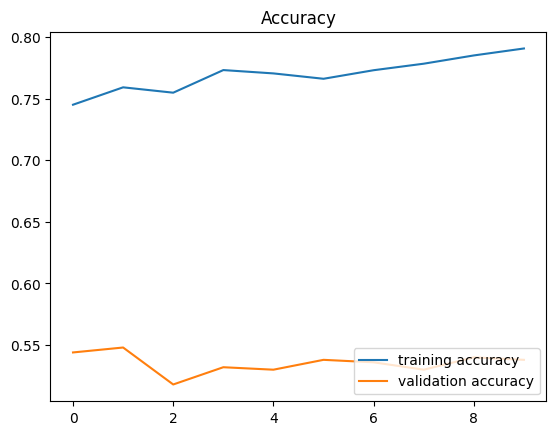

In [59]:
plot_acc(word2vec_multi_modal_model)

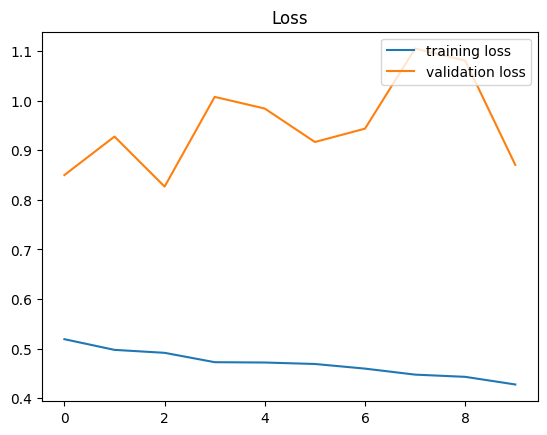

In [60]:
plot_loss(word2vec_multi_modal_model)

# Multimodel Deep Learning: Shallow

In [64]:
#The model architecture consists of an LSTM and a CNN. The LSTM takes the input as a padded sequence of the overview of a movie. The CNN takes a movie poster as the input. Each model has a fully connected layer whose output is concatenated and fed forward to a final fully connected layer with 18 output units. The output layer has a sigmoid activation function.
#Binary crossentropy was the chosen loss function and the Adam optimizer was used.
def shallow_compile_model(embedding_matrix):
  lstm_input = Input(shape=(MAX_SEQUENCE_LENGTH,))
  x = Embedding(embedding_matrix.shape[0], embedding_matrix.shape[1], mask_zero=True, input_length=MAX_SEQUENCE_LENGTH, trainable=False)(lstm_input)
  x = Dropout(0.3)(x)
  x = LSTM(64, return_sequences=True, use_cudnn=False)(x)
  x = Dropout(0.3)(x)
  x = LSTM(64, use_cudnn=False)(x)
  lstm_out = Dense(32, activation = 'relu')(x)

  print(X_img_train.shape[1], X_img_train.shape[2], X_img_train.shape[3])
  cnn_input = Input(shape=(X_img_train.shape[1], X_img_train.shape[2], X_img_train.shape[3]))
  y = Conv2D(32, (3, 3), activation='relu', input_shape=(X_img_train.shape[1], X_img_train.shape[2], X_img_train.shape[3]))(cnn_input)
  y = MaxPooling2D(2, 2)(y)
  y = Conv2D(64, (3, 3), activation='relu')(y)
  y = MaxPooling2D(2, 2)(y)
  y = Conv2D(128, (3, 3), activation='relu')(y)
  y = MaxPooling2D(2, 2)(y)
  y = Conv2D(128, (3, 3), activation='relu')(y)
  y = MaxPooling2D(2, 2)(y)
  y = Flatten()(y)
  y = Dropout(0.3)(y)
  cnn_out = Dense(512, activation='relu')(y)

  concat_inp = concatenate([cnn_out, lstm_out])
  z = Dense(256, activation='relu')(concat_inp)
  z = Dropout(0.3)(z)
  z = Dense(128, activation='relu')(z)
  z = Dropout(0.3)(z)
  output = Dense(1, activation='sigmoid')(z)

  model = Model(inputs=[cnn_input, lstm_input], outputs=[output])
  adam = Adam(learning_rate=0.001, decay=1e-5)
  
  model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
  return model

In [65]:
word2vec_model = shallow_compile_model(word2vec_embedding_matrix)
word2vec_model.summary()

115 75 3


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 115, 75,   │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 113, 73,   │        896 │ input_layer_7[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 56, 36,    │          0 │ conv2d_9[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 54, 34,    │     18,496 │ max_pooling2d_9[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_10    │ (None, 27, 17,    │          0 │ conv2d_10[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 25, 15,    │     73,856 │ max_pooling2d_10… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_6       │ (None, 433)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_11    │ (None, 12, 7,     │          0 │ conv2d_11[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, 433, 300)  │  2,740,800 │ input_layer_6[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 10, 5,     │    147,584 │ max_pooling2d_11… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_17          │ (None, 433, 300)  │          0 │ embedding_3[0][0] │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_3         │ (None, 433)       │          0 │ input_layer_6[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 5, 2, 128) │          0 │ conv2d_12[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_6 (LSTM)       │ (None, 433, 64)   │     93,440 │ dropout_17[0][0], │
│                     │                   │            │ not_equal_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 1280)      │          0 │ max_pooling2d_12… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_18          │ (None, 433, 64)   │          0 │ lstm_6[0][0]      │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_19          │ (None, 1280)      │          0 │ flatten_3[0][0]   │
│ (Dropout)           │                   │            │                 

 Total params: 3,938,593 (15.02 MB)

 Trainable params: 1,197,793 (4.57 MB)

 Non-trainable params: 2,740,800 (10.46 MB)

In [66]:
word2vec_multi_modal_model = word2vec_model.fit([X_img_train, X_text_train], train_labels, batch_size=100, epochs=20,
                            validation_data=([X_img_test, X_text_test], test_labels), callbacks = [es, csv_logger, check_point])

Epoch 1/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 25s 128ms/step - accuracy: 0.6256 - loss: 0.6639 - val_accuracy: 0.5040 - val_loss: 0.7631
Epoch 2/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - accuracy: 0.6478 - loss: 0.6365 - val_accuracy: 0.5260 - val_loss: 0.7502
Epoch 3/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - accuracy: 0.6900 - loss: 0.6091 - val_accuracy: 0.5260 - val_loss: 0.7313
Epoch 4/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - accuracy: 0.6859 - loss: 0.6065 - val_accuracy: 0.5460 - val_loss: 0.7264
Epoch 5/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - accuracy: 0.7016 - loss: 0.5843 - val_accuracy: 0.5220 - val_loss: 0.8103
Epoch 6/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - accuracy: 0.7058 - loss: 0.5765 - val_accuracy: 0.5220 - val_loss: 0.7966
Epoch 7/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - accuracy: 0.7097 - loss: 0.5710 - val_accuracy: 0.5300 - val_loss: 0.7722
Epoch 8/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - accuracy: 0.7144 - loss: 0.5612 - val_accu

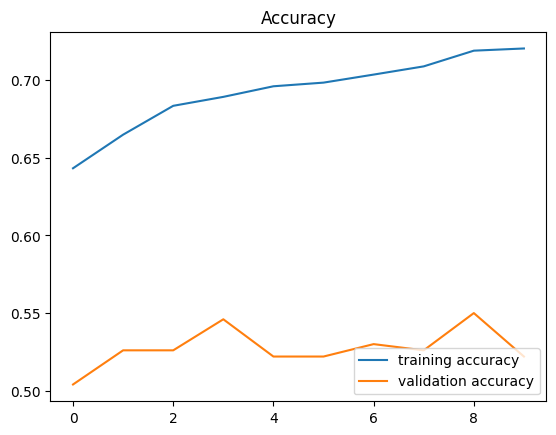

In [67]:
plot_acc(word2vec_multi_modal_model)

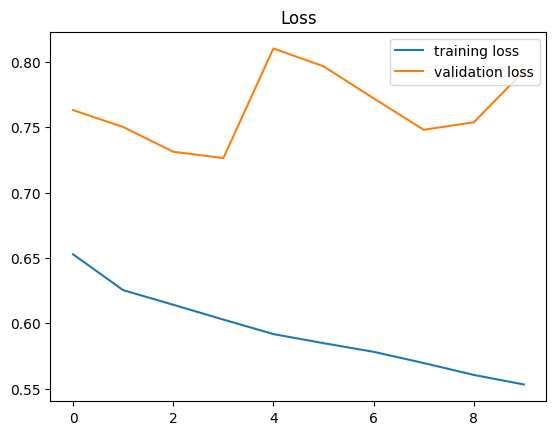

In [68]:
plot_loss(word2vec_multi_modal_model)